In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/miniProject/benetech-making-graphs-accessible.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/images/eaed09039206.jpg  
  inflating: dataset/train/images/eaed1e245167.jpg  
  inflating: dataset/train/images/eaedb251e670.jpg  
  inflating: dataset/train/images/eaeead418936.jpg  
  inflating: dataset/train/images/eaeeb1c2ecdd.jpg  
  inflating: dataset/train/images/eaef70ba842d.jpg  
  inflating: dataset/train/images/eaf036991cb3.jpg  
  inflating: dataset/train/images/eaf06e9e07db.jpg  
  inflating: dataset/train/images/eaf20f7d8945.jpg  
  inflating: dataset/train/images/eaf3a9a87868.jpg  
  inflating: dataset/train/images/eaf3d05d20a6.jpg  
  inflating: dataset/train/images/eaf3d24fb032.jpg  
  inflating: dataset/train/images/eaf3f734b5ce.jpg  
  inflating: dataset/train/images/eaf467f871a2.jpg  
  inflating: dataset/train/images/eaf65b4e3c45.jpg  
  inflating: dataset/train/images/eaf7f876411a.jpg  
  inflating: dataset/train/images/eafa35356cf8.jpg  
  inflating: dataset/train/images/eafa65caf8e7.j

**Test Image**

In [3]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

In [ ]:
# annotations = '/content/new_annotation/*'
import matplotlib.patches as patches
class_id_to_name_mapping = {v : k for k,v in stoi.items()}
# print(itos)
# fig, ax = plt.subplots()
# plt.rcParams["figure.figsize"] = (20,15)
def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    print(w,h)
    # print(image.size)
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    # print(transformed_annotations)
    # print(transformed_annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        # obj_cls, x0, y0, w, h = int(ann[0]),int(ann[1]),int(ann[2]),int(ann[3]),int(ann[4])
        obj_cls, x0, y0, x1, y1 = ann
        # print(x0,y0,x1,y1)
        plotted_image.rectangle(((x0,y0), (x1,y1)),outline = "black")
        # image_patch = np.array(image)[int(y0):int(y1),int(x0):int(x1)]
        # plt.imshow(image_patch)
        # print(class_id_to_name_mapping[(int(obj_cls))])
        # if class_id_to_name_mapping[(int(obj_cls))] in ["chart_title", "axis_title", "tick-label"]:
        #   print(image_patch.shape)
        #   extracted_text = text_reader.readtext(image_patch)[1]
        #   print(extracted_text)
        # plt.show()
        # plotted_image.point((x0,y0),fill='black')

        # plotted_image.text((x0, y0 + 10), class_id_to_name_mapping[(int(obj_cls))], (128, 255, 128))
        # print( class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
# annotation_file = random.choice(annotations)
annotation_file = "/content/dataset/train/images/annotations/0005413054c9.jpg"
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    print(annotation_list)
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

# print(annotation_list)
#Get the corresponding image file
# print(annotation_file)
image_file = annotation_file.replace("new_annotation", "dataset/train/images").replace("txt", "jpg")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [55]:
Text = [
  {
    "x": 99,
    "y": 85.56756756756756
  },
  {
    "x": 135.5,
    "y": 89.51351351351352
  },
  {
    "x": 173,
    "y": 111.3608108108108
  },
  {
    "x": 217.5,
    "y": 120.28333333333333
  },
  {
    "x": 248,
    "y": 79.61666666666666
  },
  {
    "x": 287,
    "y": 97.37105263157893
  },
  {
    "x": 325,
    "y": 90.07499999999999
  },
  {
    "x": 361,
    "y": 98.91412556053811
  },
  {
    "x": 404,
    "y": 111.06210762331837
  },
  {
    "x": 436,
    "y": 120.10246636771299
  }
]

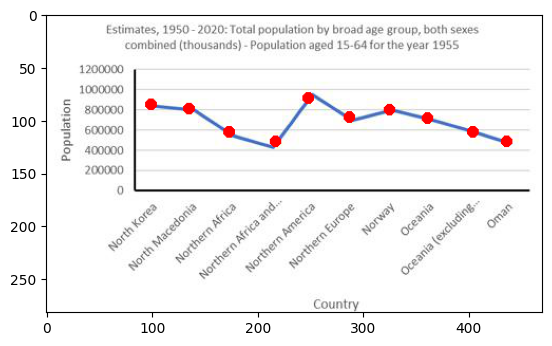

In [56]:
image_file = "/content/dataset/train/images/0005413054c9.jpg"
image = Image.open(image_file)

plotted_image = ImageDraw.Draw(image)
for ann in Text:
  x,y = ann["x"],ann["y"]
  # plotted_image.point((x,y),fill='black',size =5)
  plotted_image.ellipse((x-5,y-5,x+5,y+5), fill='red', outline=None, width=2)
plt.imshow(np.array(image))
plt.show()

In [53]:
Text = [
  {
    "height": 95,
    "width": 18,
    "x0": 92,
    "y0": 94
  },
  {
    "height": 109,
    "width": 18,
    "x0": 130,
    "y0": 80
  },
  {
    "height": 85,
    "width": 18,
    "x0": 167,
    "y0": 104
  },
  {
    "height": 79,
    "width": 18,
    "x0": 205,
    "y0": 110
  },
  {
    "height": 65,
    "width": 18,
    "x0": 243,
    "y0": 124
  },
  {
    "height": 51,
    "width": 18,
    "x0": 280,
    "y0": 138
  },
  {
    "height": 74,
    "width": 18,
    "x0": 318,
    "y0": 115
  },
  {
    "height": 61,
    "width": 18,
    "x0": 356,
    "y0": 128
  },
  {
    "height": 47,
    "width": 18,
    "x0": 394,
    "y0": 142
  },
  {
    "height": 65,
    "width": 18,
    "x0": 431,
    "y0": 124
  }
]

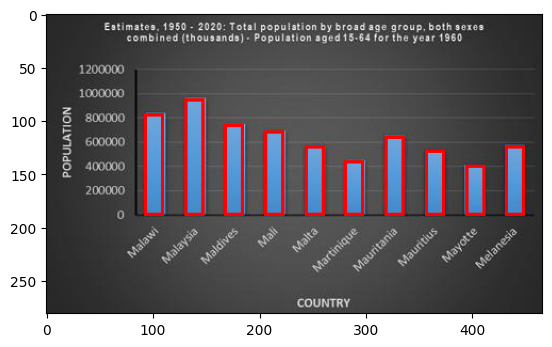

In [54]:
image_file = "/content/dataset/train/images/0000ae6cbdb1.jpg"
image = Image.open(image_file)

plotted_image = ImageDraw.Draw(image)
for ann in Text:
  x,y,w,h = ann["x0"],ann["y0"],ann["width"],ann["height"]
  x1 = x + w
  y1 = y + h
  # plotted_image.point((x,y),fill='black',size =5)
  # plotted_image.ellipse((x-5,y-5,x+5,y+5), fill='red', outline=None, width=2)
  plotted_image.rectangle(((x,y), (x1,y1)),outline = "red",width = 3)
plt.imshow(np.array(image))
plt.show()

In [51]:
Text=[
    {
      "x": 87,
      "y": 107.83333333333331
    },
    {
      "x": 104.33333333333334,
      "y": 115.83333333333331
    },
    {
      "x": 121,
      "y": 122.49999999999994
    },
    {
      "x": 139,
      "y": 139.16666666666663
    },
    {
      "x": 156.33333333333331,
      "y": 155.8333333333333
    },
    {
      "x": 173.66666666666666,
      "y": 166.49999999999997
    },
    {
      "x": 191.66666666666666,
      "y": 175.16666666666663
    },
    {
      "x": 208.33333333333331,
      "y": 179.16666666666663
    },
    {
      "x": 225.66666666666666,
      "y": 182.49999999999997
    },
    {
      "x": 243,
      "y": 184.49999999999997
    },
    {
      "x": 261.66666666666663,
      "y": 185.8333333333333
    },
    {
      "x": 278.33333333333337,
      "y": 194.49999999999997
    },
    {
      "x": 295,
      "y": 201.16666666666663
    },
    {
      "x": 311,
      "y": 207.8333333333333
    },
    {
      "x": 329,
      "y": 215.16666666666663
    },
    {
      "x": 346.33333333333337,
      "y": 221.16666666666663
    },
    {
      "x": 364.33333333333337,
      "y": 224.49999999999997
    },
    {
      "x": 381.6666666666667,
      "y": 231.8333333333333
    },
    {
      "x": 397.6666666666667,
      "y": 236.49999999999997
    },
    {
      "x": 417,
      "y": 241.16666666666663
    },
    {
      "x": 433,
      "y": 246.49999999999997
    }
  ]

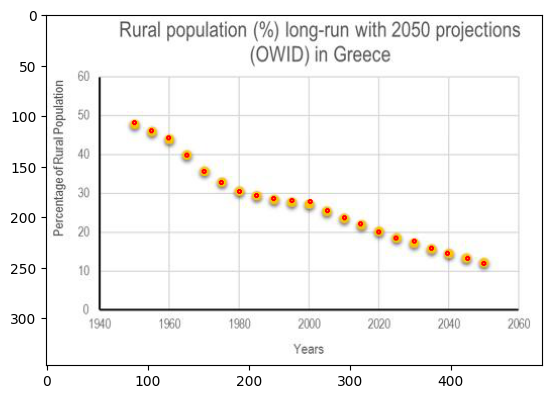

In [52]:
image_file = "/content/dataset/train/images/0005e64fdc6e.jpg"
image = Image.open(image_file)

plotted_image = ImageDraw.Draw(image)
for ann in Text:
  x,y = ann["x"],ann["y"]
  # plotted_image.point((x,y),fill='black',size =5)
  plotted_image.ellipse((x-2,y-2,x+2,y+2), fill=None, outline='red', width=2)
plt.imshow(np.array(image))
plt.show()

In [48]:
Text = [
  {
    "x": 106.66666666666667,
    "y": 249.9333333333333
  },
  {
    "x": 106.66666666666667,
    "y": 227.26666666666665
  },
  {
    "x": 107.33333333333333,
    "y": 205.9333333333333
  },
  {
    "x": 107.33333333333333,
    "y": 181.9333333333333
  },
  {
    "x": 106.66666666666667,
    "y": 160.6
  },
  {
    "x": 106.66666666666667,
    "y": 139.26666666666665
  },
  {
    "x": 107.33333333333333,
    "y": 117.26666666666665
  },
  {
    "x": 107.33333333333333,
    "y": 94.59999999999997
  },
  {
    "x": 107.33333333333333,
    "y": 73.26666666666665
  },
  {
    "x": 178.66666666666666,
    "y": 247.26666666666665
  },
  {
    "x": 178.66666666666666,
    "y": 227.26666666666665
  },
  {
    "x": 179.33333333333334,
    "y": 205.26666666666665
  },
  {
    "x": 180,
    "y": 183.9333333333333
  },
  {
    "x": 251.33333333333334,
    "y": 250.6
  },
  {
    "x": 324,
    "y": 251.26666666666665
  },
  {
    "x": 323.3333333333333,
    "y": 226.6
  },
  {
    "x": 322.6666666666667,
    "y": 204.6
  },
  {
    "x": 396.6666666666667,
    "y": 250.6
  },
  {
    "x": 395.3333333333333,
    "y": 227.9333333333333
  },
  {
    "x": 398,
    "y": 203.26666666666665
  },
  {
    "x": 469.3333333333333,
    "y": 250.6
  },
  {
    "x": 468.6666666666667,
    "y": 228.6
  },
  {
    "x": 470.6666666666667,
    "y": 203.26666666666665
  },
  {
    "x": 470,
    "y": 181.9333333333333
  },
  {
    "x": 469.3333333333333,
    "y": 161.26666666666665
  },
  {
    "x": 468.6666666666667,
    "y": 139.26666666666665
  },
  {
    "x": 468.6666666666667,
    "y": 118.59999999999997
  }
]

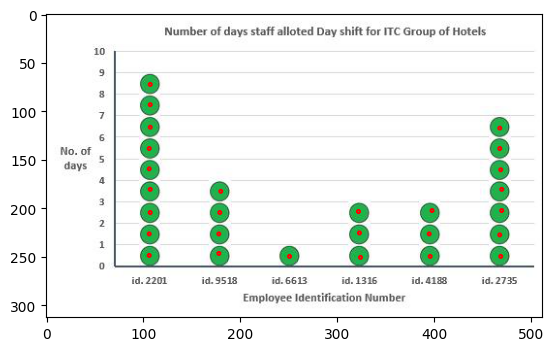

In [50]:
image_file = "/content/dataset/train/images/000917f5d829.jpg"
image = Image.open(image_file)

plotted_image = ImageDraw.Draw(image)
for ann in Text:
  x,y = ann["x"],ann["y"]
  # plotted_image.point((x,y),fill='black',size =5)
  plotted_image.ellipse((x-2,y-2,x+2,y+2), fill=None, outline='red', width=2)
plt.imshow(np.array(image))
plt.show()